## Compreendendo e construindo os modelos básicos

O objetivo dessa atividade é construir os modelos de classificação mais básicos que eu consigo e aprender a interpretá-los. Como por exemplo, entender o que é uma matriz de confusão e quais as diferentes métricas de desempenho de um algoritmo de classificação. Por isso mesmo irei usar apenas valores default para os parâmetros dos algoritmos e realizar somente um treinamento para cada um deles. Ao longo da evolução do trabalho e dos diferentes scripts usarei técnicas mais sofisticadas para machine learning, como tunning e validação cruzada, com treinamentos múltiplos. Acredito que para fins de aprendizado, esse é o melhor caminho: ir aumentando gradualmente a complexidade das análises. 

Os algoritmos utilizados são:
- Naive-Bayes
- Árvore de Decisão
- Random Forest
- KNN (K-vizinhos + Próximos)
- Regressão Logística

-----

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

### Importando os dados:

In [76]:
with open("credit.pkl", "rb") as f:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

In [77]:
X_credit_test.shape, X_credit_train.shape, y_credit_test.shape, y_credit_train.shape

((500, 3), (1500, 3), (500,), (1500,))

### Declarando funções para trechos de código que serão reutilizados:

In [78]:
def returnReport(predicted_values):
    return classification_report(y_credit_test, predicted_values)

In [79]:
def returnConfusionMatrix(model):
    cm = ConfusionMatrix(model)
    cm.fit(X_credit_train, y_credit_train)
    return cm.score(X_credit_test,y_credit_test)

### Modelo1: Naive-Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
# Treino do modelo
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_train, y_credit_train)
naive_predict = naive_credit_data.predict(X_credit_test)

In [82]:
# Teste do modelo
report_naive = returnReport(naive_predict)
print(report_naive)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.85      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.90      0.81      0.85       500
weighted avg       0.94      0.94      0.94       500



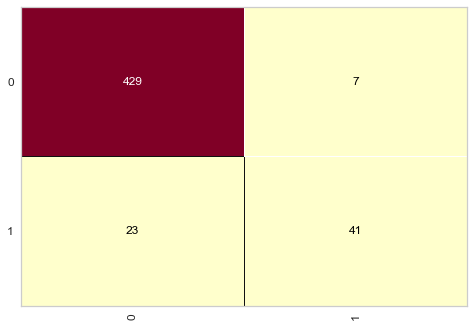

In [83]:
matrix_naive = returnConfusionMatrix(naive_credit_data)

### Modelo2: Árvores de Decisão

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
tree_credit = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_credit.fit(X_credit_train,y_credit_train)
tree_predict = tree_credit.predict(X_credit_test)

In [86]:
report_tree = returnReport(tree_predict)
print(report_tree)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



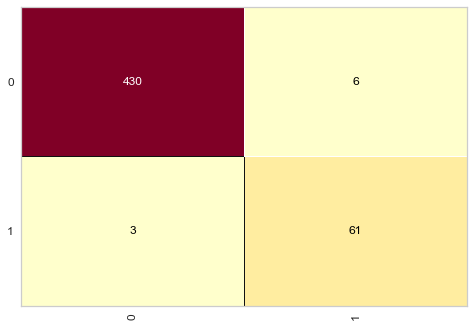

In [87]:
matrix_tree = returnConfusionMatrix(tree_credit)

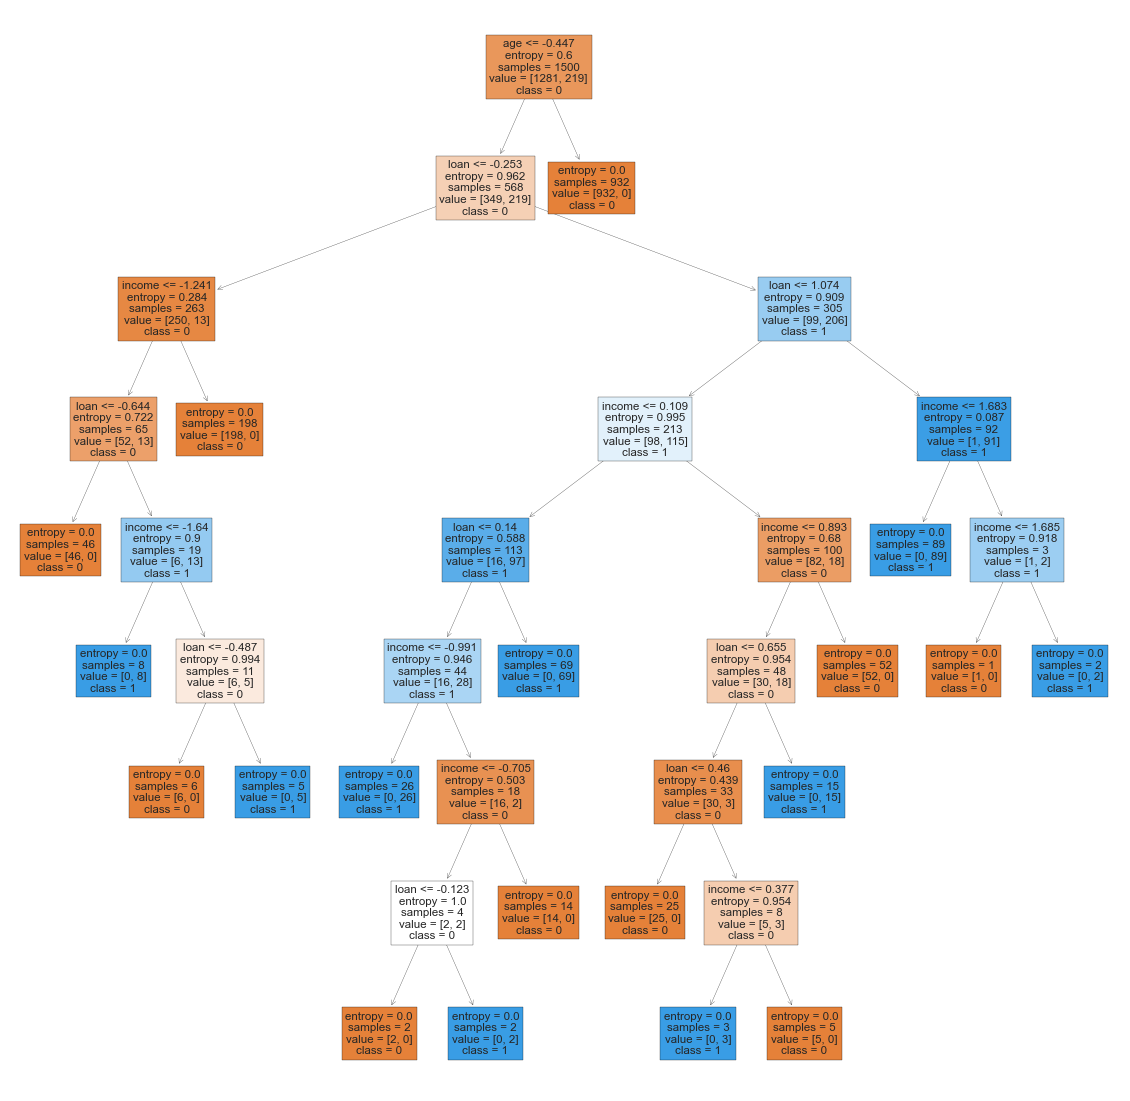

In [88]:
# Visualizar a árvore de decisão
from sklearn import tree
predictors = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(tree_credit, feature_names=predictors, class_names=['0','1'], filled=True);
fig.savefig('tree_credit.png')

### Modelo3: Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion="entropy", random_state=42)
random_forest_credit.fit(X_credit_train, y_credit_train)
random_forest_predict = random_forest_credit.predict(X_credit_test)

In [91]:
report_random_forest = returnReport(random_forest_predict)
print(report_random_forest)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.92      0.93        64

    accuracy                           0.98       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



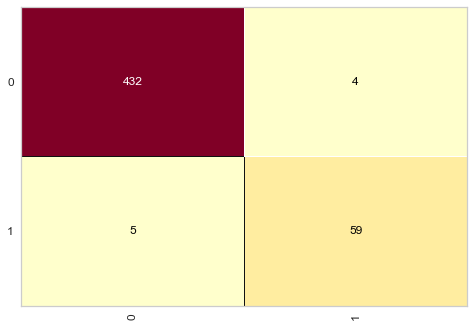

In [92]:
matrix_random_forest = returnConfusionMatrix(random_forest_credit)

### Modelo4: KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_credit_train, y_credit_train)
knn_predict = knn_credit.predict(X_credit_test)

In [95]:
report_knn = returnReport(knn_predict)
print(report_knn)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.91      0.92        64

    accuracy                           0.98       500
   macro avg       0.96      0.95      0.95       500
weighted avg       0.98      0.98      0.98       500



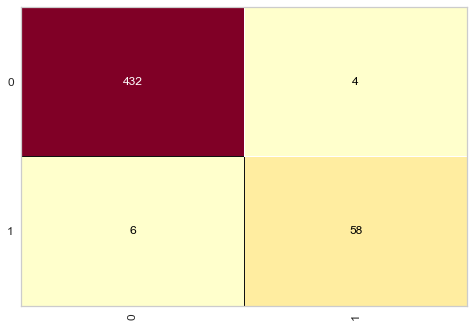

In [96]:
matrix_knn = returnConfusionMatrix(knn_credit)

### Modelo5: Regressão Logística

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
log_reg_credit = LogisticRegression(random_state=42)
log_reg_credit.fit(X_credit_train, y_credit_train)
log_reg_predict = log_reg_credit.predict(X_credit_test)

In [99]:
# Coeficientes
log_reg_credit.intercept_, log_reg_credit.coef_

(array([-6.05264344]), array([[-2.55562652, -3.74202812,  3.95118701]]))

In [100]:
report_log_reg = returnReport(log_reg_predict)
print(report_log_reg)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       436
           1       0.81      0.75      0.78        64

    accuracy                           0.95       500
   macro avg       0.89      0.86      0.87       500
weighted avg       0.94      0.95      0.95       500



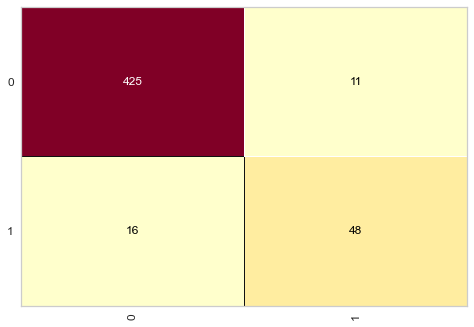

In [101]:
matrix_log_reg = returnConfusionMatrix(log_reg_credit)

### Conclusões

1.Melhor modelo: se olharmos apenas para a métrica acurácia, os modelos Árvore de Decisão, Random Forest e KNN possuem a mesma performance e poderiam ser usados para realizar as previsões de risco de crédito. Porém, a importância das demais métricas pode variar com o objetivo do problema a ser resolvido, se tornando mais ou menos relevante que a acurácia em contextos diferentes. 

2.Todos os algoritmos performaram melhor para a classe 0, que tem muito mais registros que a classe 1. Talvez um balanceamento de classes possa ajudar a refinar os resultados.